# Nutrition Analysis of Leading Fast Food Restaurants

####   _An ANOVA, two-sided t test, & a correlation test_

## Purpose

 According to the CDC, one in three Americans consume fast food on any given day. This means fast food is a large part of the American diet. While most of us know that fast food can be very unhealthy, we still eat it. This analysis looks further into the different fast food options we have and strives to determine if we can select fast food options that are healthier than others.

In [45]:
# 1) import dataset and view 

# Import Pandas

import pandas as pd

# Read Data File

foodSet = pd.read_csv('downloads/fastfood.csv')

# view file 

foodSet.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [46]:
#2) Data Cleaning and processing to Prepare for Analysis

# Remove Salad Column 

foodSet =  pd.DataFrame(foodSet)

foodSet = foodSet.drop(columns=['salad'])

foodSet.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0


### Question 1:
### Is there a significant difference in calories between fast food chains?

- This can help us select the restaurants with lowest calories for our health


## ANOVA Analysis

#### Null Hypothesis: All restaurants have similar mean μ1=μ2=μ3...
#### Alternative Hypothesis: At least one restaurant has a significantly different mean μi != μj for some i, j


#### Steps:

1) Visualize Data  
2) Process Data into usable form for analysis  
3) Check ANOVA normality assumptions  
4) Conduct Anova statistical test 

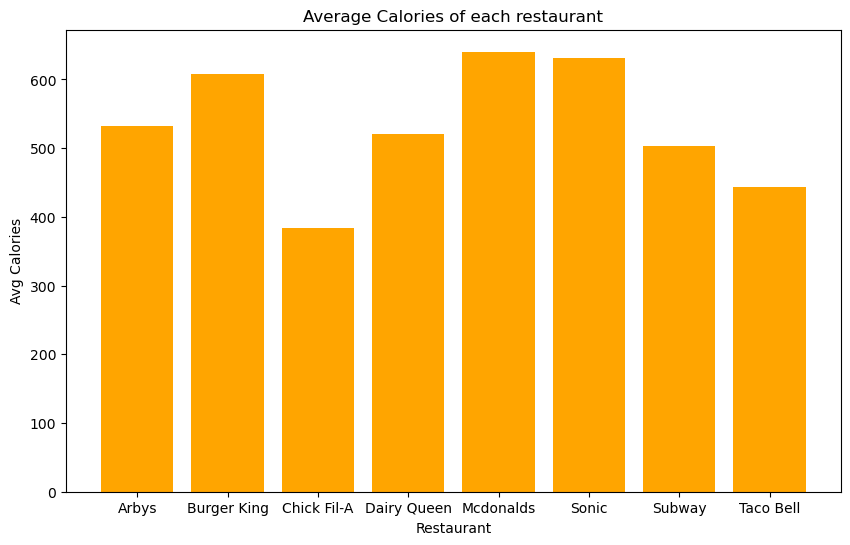

In [47]:
# 1) Visualize Data 

import matplotlib.pyplot as plt
import seaborn as sns 


# Build Bar Graph

avg_calories = foodSet.groupby('restaurant')['calories'].mean().reset_index()

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(avg_calories['restaurant'], avg_calories['calories'], color='orange')

# Customizing the plot
plt.xlabel('Restaurant')
plt.ylabel('Avg Calories')
plt.title('Average Calories of each restaurant')

# Display the plot
plt.show()

In [48]:
# 2) Process Data into usable form for Analysis

# Build column to classify menu items into groups for analysis

burger_keywords = ['burger', 'sandwich', 'mac', 'mcchicken']
wrap_keywords = ['wrap', 'burrito']
salad_keywords = ['salad']
chicken_keywords = ['tenders', 'strips', 'tender', 'strip']
nuggets_keywords = ['nuggets']

def categorize_food(item_title):
    if any(keyword in item_title.lower() for keyword in burger_keywords):
        return 'burger'
    elif any(keyword in item_title.lower() for keyword in wrap_keywords):
        return 'wrap'
    elif any(keyword in item_title.lower() for keyword in salad_keywords):
        return 'salad'
    elif any(keyword in item_title.lower() for keyword in chicken_keywords):
        return 'tenders'
    elif any(keyword in item_title.lower() for keyword in nuggets_keywords):
        return 'nuggets'
    else:
        return 'other'  

foodSet['Food_Category'] = foodSet['item'].apply(categorize_food)

foodSet.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Food_Category
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,burger
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,burger
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,burger
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,burger
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,burger


In [49]:
#group calories

avg_calories = foodSet.groupby('restaurant')['calories'].mean().reset_index()

# Step 3: Rename the columns for better clarity
avg_calories.columns = ['restaurant', 'Average_Calories']

# Step 4: Output the result
print(avg_calories)


    restaurant  Average_Calories
0        Arbys        532.727273
1  Burger King        608.571429
2  Chick Fil-A        384.444444
3  Dairy Queen        520.238095
4    Mcdonalds        640.350877
5        Sonic        631.698113
6       Subway        503.020833
7    Taco Bell        443.652174


In [50]:
# 3) Check Normality Assumptions for ANOVA

#1: Samples are independent - PASSED by design

#2: Samples have homogeneity (similar variances) - PASSED by visual inspection

#3: Normality - PASSED by Shapiro Wilks Test

from scipy.stats import shapiro

avg_calories_data = avg_calories['Average_Calories']

stat, p = shapiro(avg_calories_data)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Average calories data looks normally distributed (fail to reject H0)")
else:
    print("Average calories data does not look normally distributed (reject H0)")




Average calories data looks normally distributed (fail to reject H0)


In [51]:
# 4) Conduct ANOVA 

from scipy.stats import f_oneway

calories_by_restaurant = foodSet.groupby('restaurant')['calories'].apply(list).reset_index()

anova_result = f_oneway(*calories_by_restaurant['calories'])

# Print ANOVA result

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# since p value < significance level 0.5, we reject the null hypothesis and there exists a significant 
# difference between 2 or more restaurants



ANOVA F-statistic: 6.084958510294527
ANOVA p-value: 7.746597005801183e-07


### Results:  
####  Since p value < significance level 0.5, we reject the null hypothesis and there exists a significant  difference between 2 or more restaurants


 - This means we need to conduct pairwise testing to find which specific restaurants differed from each other in calories

In [52]:
# PERFORM PAIRWISE TESTING TO FIND SPECIFIC DIFFERENCES

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(foodSet['calories'], foodSet['restaurant'], alpha=0.05)

# Print pairwise comparison results
print(tukey_results)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
      Arbys Burger King   75.8442 0.7848  -73.9507 225.6391  False
      Arbys Chick Fil-A -148.2828 0.2899  -343.634  47.0684  False
      Arbys Dairy Queen  -12.4892    1.0 -182.8432 157.8648  False
      Arbys   Mcdonalds  107.6236 0.4263  -49.5077 264.7549  False
      Arbys       Sonic   98.9708 0.5636  -61.0457 258.9874  False
      Arbys      Subway  -29.7064 0.9982  -170.293 110.8802  False
      Arbys   Taco Bell  -89.0751 0.4902 -225.3659  47.2157  False
Burger King Chick Fil-A  -224.127 0.0077 -412.4604 -35.7936   True
Burger King Dairy Queen  -88.3333  0.715 -250.5919  73.9253  False
Burger King   Mcdonalds   31.7794 0.9981 -116.5365 180.0954  False
Burger King       Sonic   23.1267 0.9998 -128.2427 174.4961  False
Burger King      Subway -105.5506 0.2158 -236.2103  25.1092  F

### ANOVA conclusions:

Based on pairwise testing analysis, there is a significant difference in avg number of calories between the following restaurants:

 Significant differences Include:
  - Chick Fil A and Burger King, 
  - Chick Fil A and McDonalds,
  - Chick Fil A and Sonic, 
  - Burger King and Taco Bell,
  - McDonalds and Taco Bell, 
  - Sonic and Taco Bell. 
  
#### CONCLUSION: 
 Burger King, McDonalds, and Sonic had the highest avg number of calories, and Chick-FIl A and Taco Bell 
 had lowest number of calories, significantly different from those in Highest. So if a customer is choosing between
 restaurants, it is wiser to go with the significantly lower calorie restaurants,
 Chick-Fil-A and Taco Bell. 

### Question 2:
### Are Wrap/Burrito Options Healthier than Burgers? (In terms of Fat)

 - This can help us make healthier menu choices at the fast food restaurants we do visit.  

## Two-Sided t-test Analysis

#### Null Hypothesis: Wraps and Burgers have similar mean Fat μ1 = μ2
#### Alternative Hypothesis: Wraps and Burgers have significantly different mean fat . μ1 != μ2
#### Steps:

1) Visualize Data    
2) perform two-sided t test

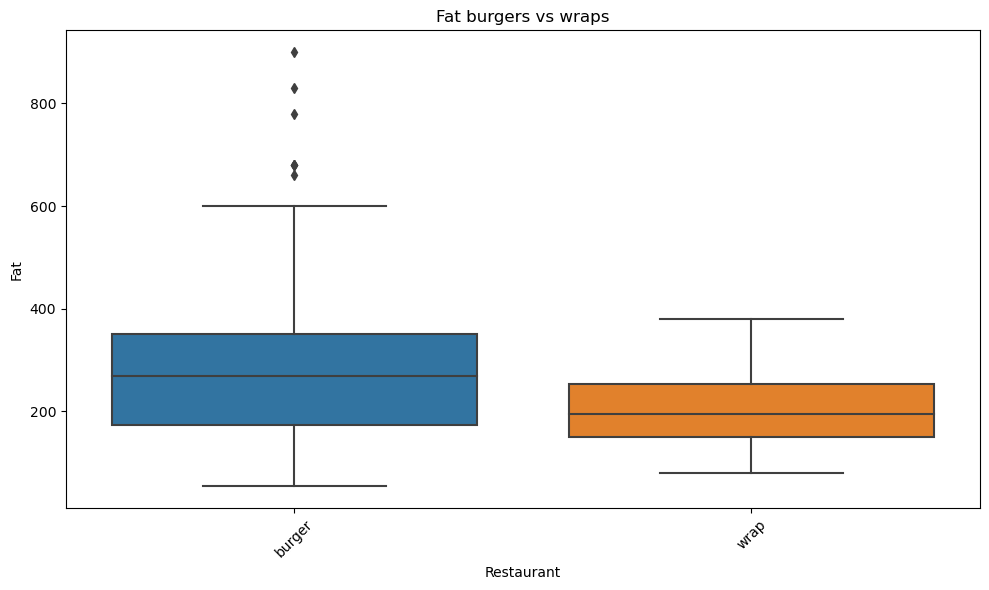

In [53]:

#1) Visualize Data


# Build Box Plot

foodSet

# Define the two categories you want to filter by
category_1 = 'burger'  # Replace with your actual category value
category_2 = 'wrap'  # Replace with your actual category value

# Filter the DataFrame to include only the rows with the specified categories
filtered_df = foodSet[foodSet['Food_Category'].isin([category_1, category_2])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Food_Category', y='cal_fat', data=filtered_df)
plt.title('Fat burgers vs wraps')
plt.xlabel('Restaurant')
plt.ylabel('Fat')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout()
plt.show()


In [54]:
#2)  perform two sided t test

filtered_df
from scipy import stats

fat_by_item = filtered_df.groupby('Food_Category')['cal_fat'].apply(list).reset_index()


calories_list = fat_by_item['cal_fat']


t_stat, p_value = stats.ttest_ind(calories_list[0], calories_list[1])

if p_value <= 0.05:
    print("Reject the null hypothesis. There is a significant difference between burgers and wraps in terms of calories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between burgers and wraps in terms of calories!")


Reject the null hypothesis. There is a significant difference between burgers and wraps in terms of calories.


### Two-sided T-test conclusions:

Based on two-sided t-test analysis, there is a significant difference in avg fat content of wraps and burgers. 

#### CONCLUSION: 
Wraps/Burritos had significantly less fat content than burgers. This is likely due to the fact that wraps/burritos are more balanced with veggies and healthier ingredients, whereas burgers boast their large sizes and fattening ingredients. When choosing between menu items, it is wise to choose lower fat options like wraps rather than burgers for your health

### QUESTION 3:
### Is there a significant correlation between calories and cholesterol?

 - This information can help us apply what we know about restaurants with high calories and connect it to other common health issues like cholesterol issues that fast food contributes to. 

### Spearman's Correlation Test

Null Hypothesis: There is no significant correlation between calories and cholesterol

Alternate Hypothesis: There exists a significant correlation between calories and cholesterol

Steps:
1) Visualize Data    
2) Conduct Spearman's correlation test

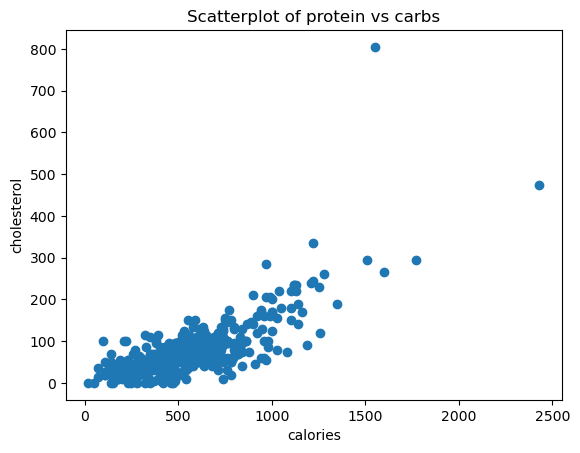

Spearman's correlation: 0.7301813749472219
P-value: 6.652060615230952e-87


In [55]:

import matplotlib.pyplot as plt

# Scatterplot

plt.scatter(foodSet['calories'], foodSet['cholesterol'])
plt.xlabel('calories')
plt.ylabel('cholesterol')
plt.title('Scatterplot of protein vs carbs')
plt.show()


from scipy.stats import spearmanr


# Calculate Spearman's correlation
correlation, p_value = spearmanr(foodSet['calories'], foodSet['cholesterol'])

print(f"Spearman's correlation: {correlation}")
print(f"P-value: {p_value}")


### Spearman's Correlation Conclusions
Since p value is less than 0.05, based on correlation test, there is a significantly positive correlation between calories and cholesterol.

#### CONCLUSION: 
This means that if a restaurant/menu item is high in calories, you need to watch out for some other unhealthy nutrition factors as well such as cholesterol. So if your doctor tells you to lower your cholesterol, avoid high calorie items!

### FINAL CONCLUSIONS

- Based on our ANOVA, the leading fast food restaurants do have significantly different amounts of calories, with the highest calorie chains being McDonalds, Burger King, and Sonic, and lowest calorie chains being Taco Bell and Chik-Fil-A.


- Based on our two-sided t-test, wraps/burritos had significantly less fat content than burgers.


- Based on our Spearman's correlation test, there is a significantly positive correlation between calories and cholesterol.


#### Final Recommendations: 
To take better care of your health when you do visit fast food restaurants, be sure to visit chains with lower calories such as Taco Bell and Chik-Fil-A, and be mindful of what you order, as wraps/burritos, on average, have less fat than traditional burgers. Finally, take other nutrition factors into account when you opt for high calorie items, as high calories have a positive correlation to high cholesterol and other similar issues. 